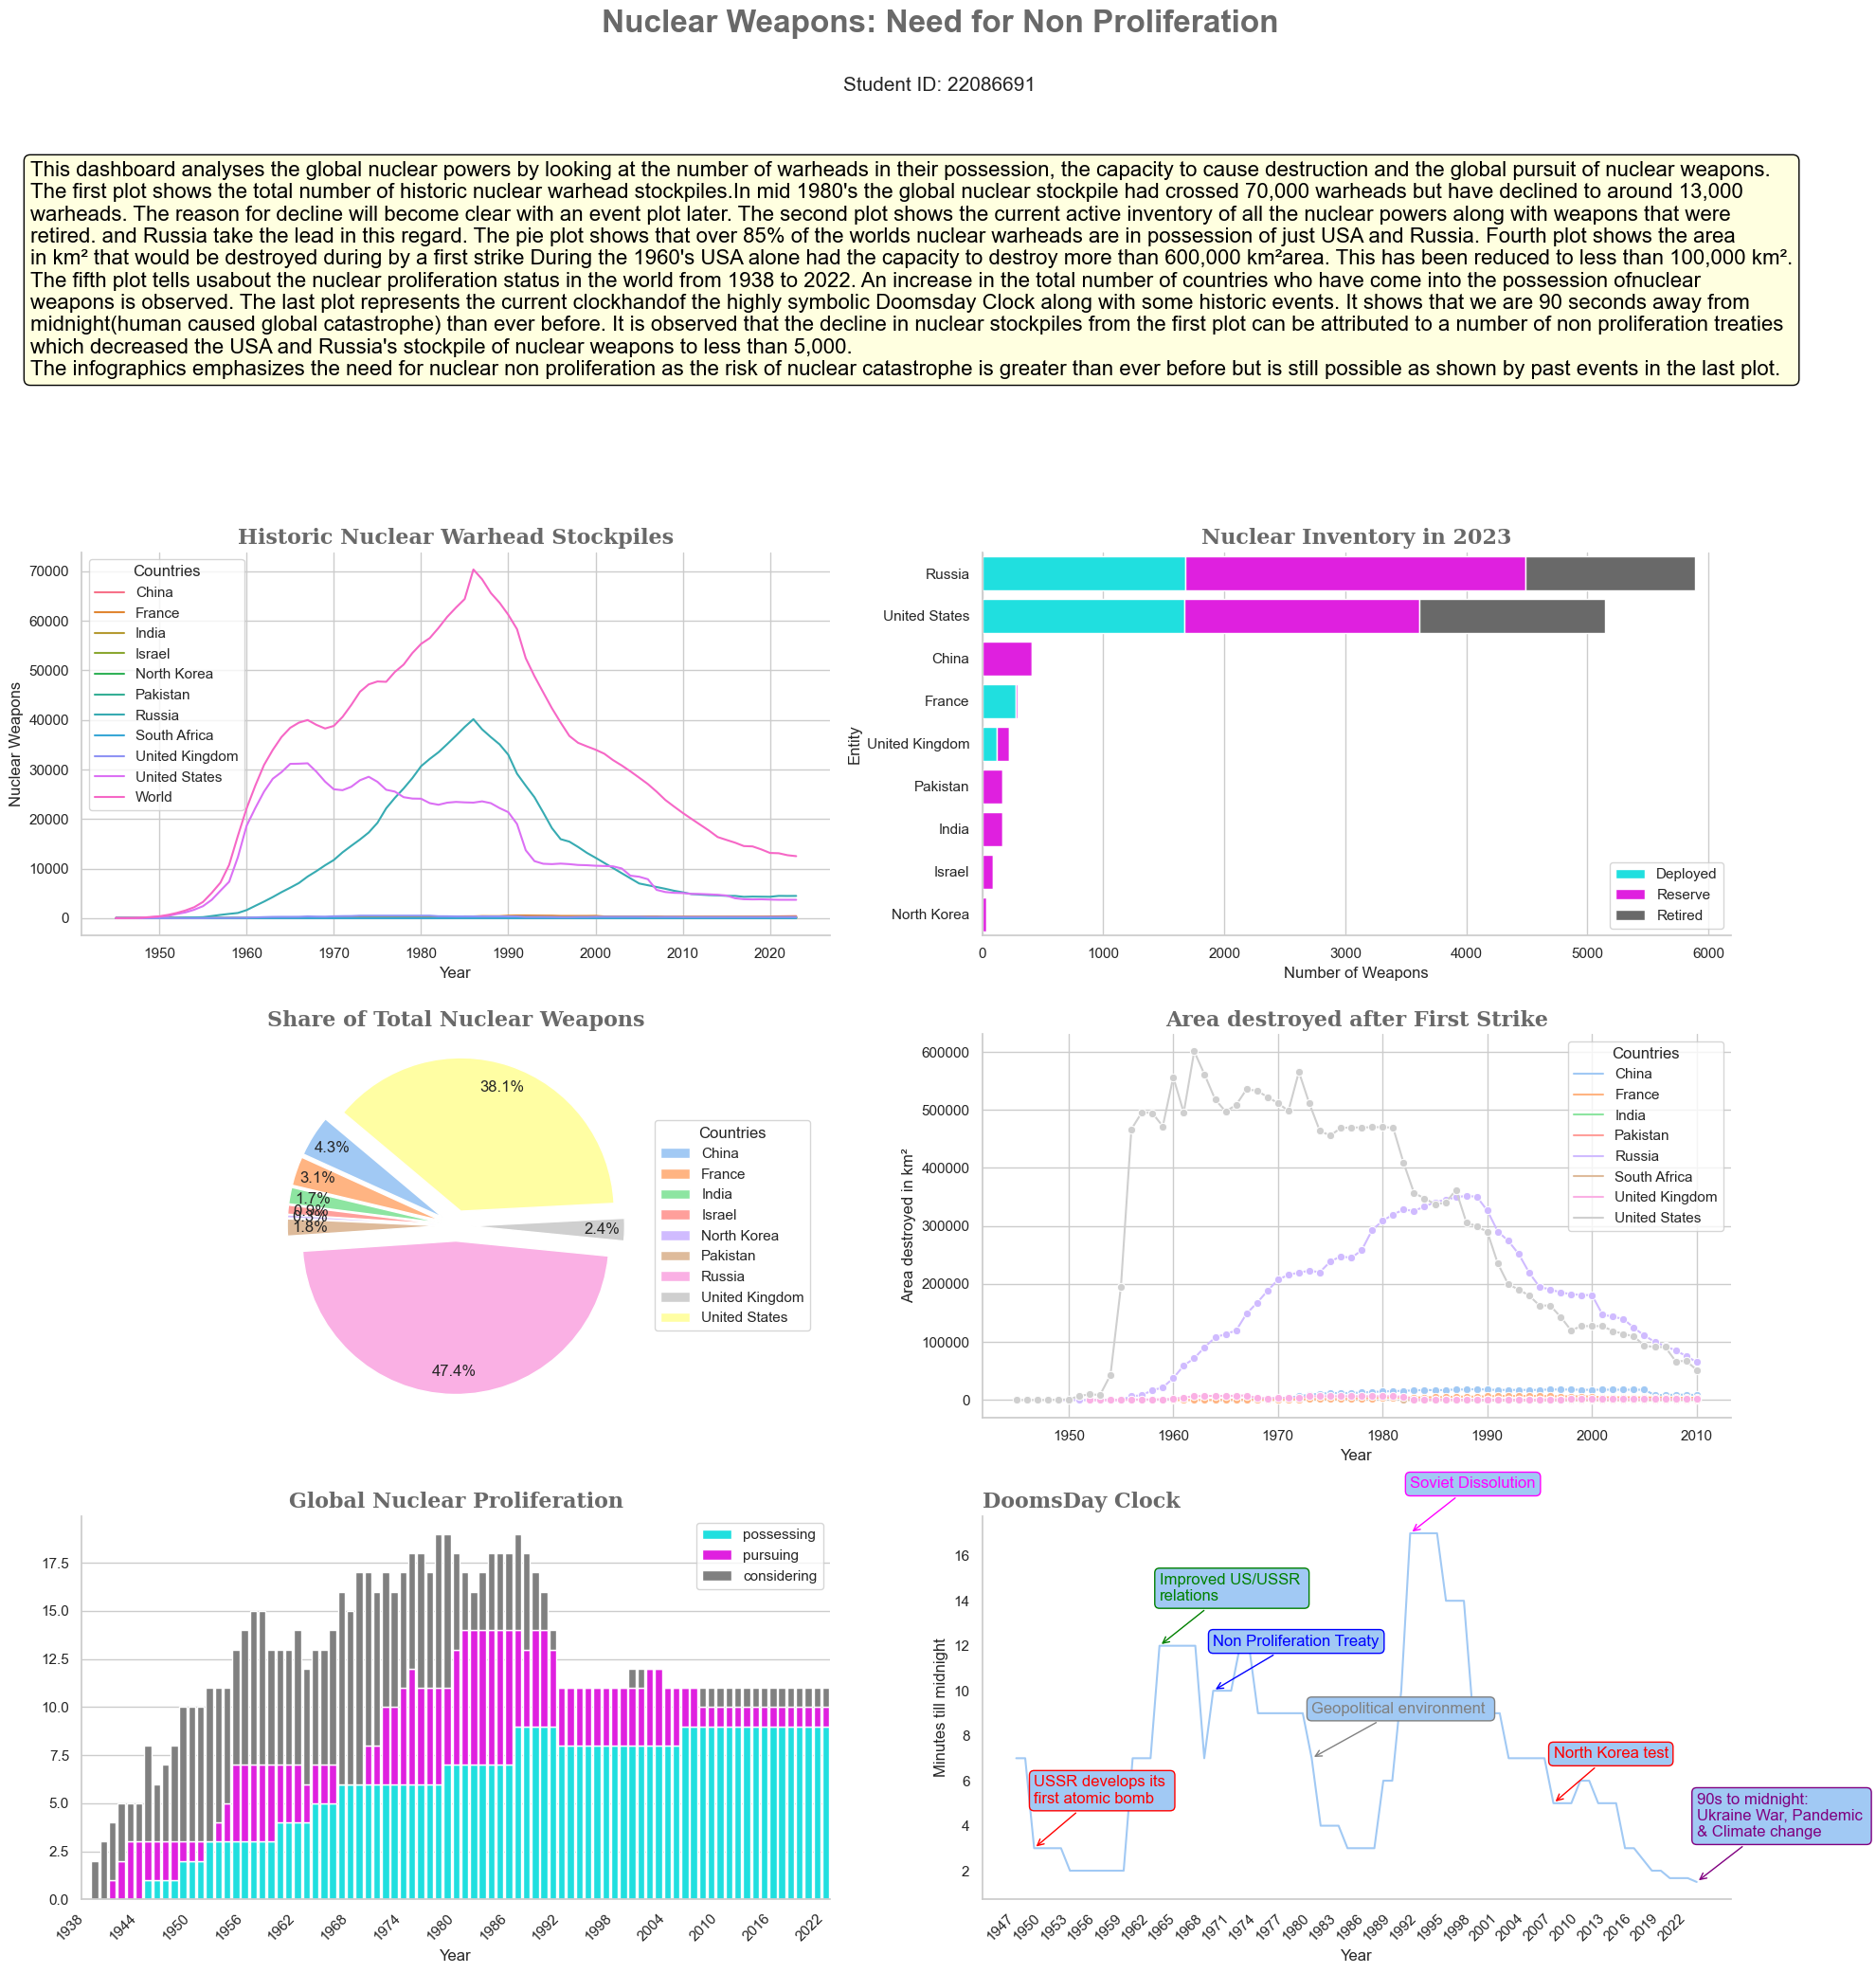

In [160]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jan 10 09:07:19 2024

@author: Rhino
"""

import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
# Set a color palette
sns.set_palette('pastel')
# Create title font
font = {'family': 'serif',
        'color':  'dimgrey',
        'weight': 'bold',
        'size': 16,
        }

# -----------------------------------------------------
fig, axes = plt.subplots(3, 2, figsize=(20, 16))

axes = axes.flatten()

# Plot 1  --------------------------------------------------
warhead_df = pd.read_csv('nuclear-warhead-stockpiles.csv')
warhead_df.drop('Code', axis=1, inplace=True)
sns.lineplot(x='Year', y='nuclear_weapons_stockpile', hue='Entity', ax=axes[0],
             data=warhead_df)
axes[0].set_ylabel('Nuclear Weapons')
axes[0].legend(title='Countries')
axes[0].set_title('Historic Nuclear Warhead Stockpiles', fontdict=font)

# Plot 2  --------------------------------------------------
inventory_df = pd.read_csv('nuclear-warhead-inventories.csv')
inventory_df.drop('Code', inplace=True, axis=1)

# Define a dictionary to map current column names to new column names
column_name_mapping = {
    'nuclear_weapons_depl_strat': 'Deployed',
    'nuclear_weapons_depl_nonstrat': 'Non-Strat',
    'nuclear_weapons_reserve_nondepl': 'Reserve',
    'nuclear_weapons_retired': 'Retired'}
# Use the rename method to rename columns
inventory_df.rename(columns=column_name_mapping, inplace=True)
# Select only rows with the latest values
inventory_df = inventory_df[inventory_df['Year'] == 2023]
# Set 'Entity' as the index
inventory_df.set_index('Entity', inplace=True)
inventory_df['cum_warhead'] = (inventory_df['Deployed'] +
                               inventory_df['Reserve'] +
                               inventory_df['Retired'])
inventory_sorted = inventory_df.sort_values(by='cum_warhead', ascending=False)
# Create a horizontal stacked bar graph
sns.barplot(x='Deployed', y=inventory_sorted.index, data=inventory_sorted,
            label='Deployed', errorbar=None, color='cyan', ax=axes[1])
sns.barplot(x='Reserve', y=inventory_sorted.index, data=inventory_sorted,
            label='Reserve', errorbar=None, color='magenta', ax=axes[1],
            left=inventory_sorted['Deployed'])
sns.barplot(x='Retired', y=inventory_sorted.index, data=inventory_sorted,
            color='dimgrey', label='Retired', errorbar=None, ax=axes[1],
            left=inventory_sorted['Deployed'] + inventory_sorted['Reserve'])
# Add labels and title
axes[1].set_xlabel('Number of Weapons')
axes[1].set_ylabel('Entity')
axes[1].legend()
axes[1].set_title('Nuclear Inventory in 2023', fontdict=font)

# Plot 3  ---------------------------------------------
inventory_df['active_nukes'] = (inventory_df['Deployed'] +
                                inventory_df['Reserve'])
# Explode values
explode_values = [0.1] * len(inventory_df['active_nukes'])
axes[2].pie(x=inventory_df['active_nukes'], autopct='%1.1f%%', startangle=140,
            shadow=False, explode=explode_values, pctdistance=.85)
# Adjust the layout and distance of percentage labels
axes[2].legend(inventory_df.index, loc='center left',
               bbox_to_anchor=(1, 0.5), title='Countries')
axes[2].set_title('Share of Total Nuclear Weapons', fontdict=font)

# Plot 4  ---------------------------------------------
area_df = pd.read_csv('destroyed-area.csv')
area_df.rename(columns={'nuclwarh_firststr_area': 'Area_dest'}, inplace=True)

# Line plot for area_df
sns.lineplot(x='Year', y='Area_dest', data=area_df, hue='Entity', marker='o',
             ax=axes[3])
sns.despine()
axes[3].set_ylabel('Area destroyed in km²')
axes[3].legend(title='Countries')
axes[3].set_title('Area destroyed after First Strike', fontdict=font)

# Plot 5  --------------------------------------------
prolif_df = pd.read_csv('nuclear-weapons-proliferation.csv')
column_map = {'number_nuclweap_consideration': 'considering',
              'number_nuclweap_pursuit': 'pursuing',
              'number_nuclweap_possession': 'possessing'}
prolif_df.rename(columns=column_map, inplace=True)

# Stacked Bar plot
ax1 = sns.barplot(data=prolif_df, x='Year', y='possessing', color='cyan',
                  label='possessing', ax=axes[4])
ax2 = sns.barplot(data=prolif_df, x='Year', y='pursuing', color='magenta',
                  bottom=prolif_df['possessing'], label='pursuing', ax=axes[4])
ax3 = sns.barplot(data=prolif_df, x='Year', y='considering', color='grey',
                  bottom=prolif_df['possessing'] + prolif_df['pursuing'],
                  label='considering', ax=axes[4])
# Set x-labels with steps (skip every 6th)
tick_positions = np.arange(0, len(prolif_df['Year']), 6)
axes[4].set_xticks(tick_positions, prolif_df['Year'].iloc[tick_positions],
                   rotation=45, ha='right')
axes[4].legend()
axes[4].set_ylabel(None)
axes[4].set_title('Global Nuclear Proliferation', fontdict=font)

# Plot 6   ------------------------------------------
dday_df = pd.read_excel('d-day.xlsx', sheet_name=1, skiprows=4,
                        usecols=[1, 2], names=['Year', 'Clock'])
# Create a line plot using Seaborn
sns.lineplot(x='Year', y='Clock', data=dday_df, ax=axes[5])
# Add text annotations and arrows at specific years
annotations = [
    {'text': 'USSR develops its \nfirst atomic bomb', 'year': 1949,
     'arrow_color': 'red'},
    {'text': 'Improved US/USSR \nrelations', 'year': 1963,
     'arrow_color': 'green'},
    {'text': 'Non Proliferation Treaty', 'year': 1969, 'arrow_color': 'blue'},
    {'text': 'Geopolitical environment ', 'year': 1980, 'arrow_color': 'grey'},
    {'text': 'Soviet Dissolution', 'year': 1991, 'arrow_color': 'magenta'},
    {'text': 'North Korea test', 'year': 2007, 'arrow_color': 'red'},
    {'text': '90s to midnight: \nUkraine War, Pandemic \n& Climate change',
     'year': 2023, 'arrow_color': 'purple'}
]

for annotation in annotations:
    arrow_text = annotation['text']
    arrow_x = annotation['year']
    arrow_y = dday_df.loc[dday_df['Year'] == arrow_x, 'Clock'].values[0]
    arrow_color = annotation['arrow_color']
    arrow_props = dict(facecolor=arrow_color, edgecolor=arrow_color,
                       arrowstyle='->')
    axes[5].annotate(arrow_text, xy=(arrow_x, arrow_y),
                     xytext=(arrow_x, arrow_y + 2), arrowprops=arrow_props,
                     fontsize=12, color=arrow_color,
                     bbox=dict(boxstyle='round', ec=arrow_color))
# Set x-labels with steps (skip 3)
tick_positions = np.arange(0, len(dday_df['Year']), 3)
axes[5].set_xticks(dday_df['Year'][::3], dday_df['Year'].iloc[tick_positions],
                   rotation=45, ha='right')
sns.despine()
axes[5].grid(None)
# Add labels and title
axes[5].set_xlabel('Year')
axes[5].set_ylabel('Minutes till midnight')
axes[5].set_title('DoomsDay Clock', fontdict=font, loc='left')

# Dashboard Title
fig.suptitle('Nuclear Weapons: Need for Non Proliferation', fontsize=24,
             fontweight='bold', y=1.3, color='dimgrey')
# Add a subtitle below the suptitle
fig.text(0.5, 1.25, 'Student ID: 22086691',
         ha='center', va='center', fontsize=15)

paragraph = "This dashboard analyses the global nuclear powers by looking at \
the number of warheads in their possession, the capacity to cause \
destruction and the global pursuit of nuclear weapons.\n\
The first plot shows the total number of historic nuclear warhead stockpiles.\
In mid 1980\'s the global nuclear stockpile had crossed 70,000 warheads but \
have declined to around 13,000 \nwarheads. The reason for decline will become \
clear with an event plot later. The second plot shows the current active \
inventory of all the nuclear powers along with weapons that were \nretired. \
and Russia take the lead in this regard. The pie plot shows that over 85% of \
the worlds nuclear warheads are in possession of just USA and Russia. Fourth \
plot shows the area\nin km² that would be destroyed during by a first strike \
During the 1960\'s USA alone had the capacity to destroy more than 600,000 km²\
area. This has been reduced to less than 100,000 km².\nThe fifth plot tells us\
about the nuclear proliferation status in the world from 1938 to 2022. An \
increase in the total number of countries who have come into the possession of\
nuclear\nweapons is observed. The last plot represents the current clockhand\
of the highly symbolic Doomsday Clock along with some historic events. It \
shows that we are 90 seconds away from \nmidnight(human caused global \
catastrophe) than ever before. It is observed that the decline in nuclear \
stockpiles from the first plot can be attributed to a number of non \
proliferation treaties \nwhich decreased the USA and Russia\'s stockpile of \
nuclear weapons to less than 5,000.\nThe infographics emphasizes the need for \
nuclear non proliferation as the risk of nuclear catastrophe is greater than \
ever before but is still possible as shown by past events in the last plot."
# Add a text annotation to the figure
fig.text(0.02, 1.2, paragraph, fontsize=16, color='black', ha='left', va='top',
         bbox=dict(boxstyle='round', facecolor='lightyellow',
                   edgecolor='black'))

# Adjust layout
plt.tight_layout()

# Save the dashboard
plt.show()